In [1]:
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io

In [2]:
kor_train_path = os.path.join('./korean-english-park.train.ko')
eng_train_path = os.path.join('./korean-english-park.train.en')
kor_test_path = os.path.join('./korean-english-park.test.ko')
eng_test_path = os.path.join('./korean-english-park.test.en')

# 1. kor-train
with open(kor_train_path, "r") as f:
    kor_train_raw = f.read().splitlines()

# 2. eng-train
with open(eng_train_path, "r") as f:
    eng_train_raw = f.read().splitlines()

# 3. kor-test
with open(kor_test_path, "r") as f:
    kor_test_raw = f.read().splitlines()

# 4. eng-test
with open(eng_test_path, "r") as f:
    eng_test_raw = f.read().splitlines()
    
print("Kor Train Data Size:", len(kor_train_raw))
print("Eng Train Data Size:", len(eng_train_raw))
print("Kor Test Data Size:", len(kor_test_raw))
print("Eng Test Data Size:", len(eng_test_raw))

Kor Train Data Size: 94123
Eng Train Data Size: 94123
Kor Test Data Size: 2000
Eng Test Data Size: 2000


In [3]:
print("Kor Train Example:")
for sen in kor_train_raw[0:100][::20]: print(">>", sen)

print("Eng Train Example:")
for sen in eng_train_raw[0:100][::20]: print(">>", sen)

print("Kor Test Example:")
for sen in kor_test_raw[0:100][::20]: print(">>", sen)

print("Eng Test Example:")
for sen in eng_test_raw[0:100][::20]: print(">>", sen)

Kor Train Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.
Eng Train Example:
>> Much of personal computing is about "can you top this?"
>> Amid mounting pressure on North Korea to abandon its nuclear weapons program Japanese and North Korean diplomats have resumed talks on normalizing diplomatic relations.
>> “Guard robots are used privately and professionally to detect intruders or fire,” Karlsson said.
>> Authorities from the Water Resources Ministry plan to begin construction next year on the controversial and hugely expensive project.
>> Researchers also have debated whether weight-training has a big impact on the heart, since it does not give the heart and lu

In [12]:
def check_sentence_length(raw, str): 
    min_len = 999
    max_len = 0
    sum_len = 0

    for sen in raw:
        length = len(sen)
        if min_len > length: min_len = length
        if max_len < length: max_len = length
        sum_len += length

    print("문장의 최단 길이:", min_len)
    print("문장의 최장 길이:", max_len)
    print("문장의 평균 길이:", sum_len // len(raw))

    sentence_length = np.zeros((max_len), dtype=int)

    for sen in raw:
        sentence_length[len(sen)-1] += 1

    plt.bar(range(max_len), sentence_length, width=1.0)
    plt.title(f'{str} Sentence Length Distribution')
    plt.show()
    
    return sentence_length

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


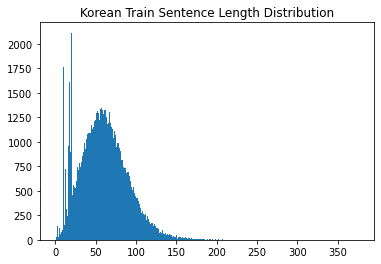

In [13]:
kotrain_sen_length = check_sentence_length( kor_train_raw, "Korean Train")

문장의 최단 길이: 1
문장의 최장 길이: 605
문장의 평균 길이: 126


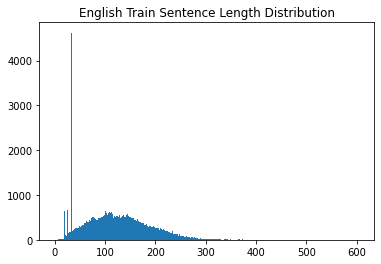

In [15]:
entrain_sen_length = check_sentence_length( eng_train_raw, "English Train")

In [97]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for idx, sen in enumerate(raw):
        if len(sen) == length:
            print(f"[{idx}] <{sen}>")
            count += 1
            if count > 100:
                return

In [26]:
check_sentence_with_length(kor_train_raw, 1)

[11724] ’


In [27]:
check_sentence_with_length(eng_train_raw, 1)

[11724] "
[33709] .
[49537] ·
[49633] ·
[49894] ·
[50155] ·
[50416] ·
[50677] ·
[50938] ·
[51199] ·
[51460] ·


In [28]:
check_sentence_with_length(kor_train_raw, 2)

[6262] 1.
[6267] 2.
[6271] 3.
[6274] 4.
[8293] 면접
[8933] 음식
[8939] 햇빛
[10066] 과일
[10076] 양파
[11849] Q:
[13337] 4.
[13346] 6.
[33709] ..


In [32]:
eng_train_raw[8293]

'The interview'

In [29]:
check_sentence_with_length(eng_train_raw, 2)

[9491] 5.
[32797] 3.
[32817] 7.


In [30]:
check_sentence_with_length(kor_train_raw, 3)

[10134] 코브:
[10147] 코브:
[10494] MMR
[21064] 버뮤다
[22515] ▲쇼핑
[26703] 첫째날
[26710] 둘째날
[32795] 교훈:
[32802] 교훈:
[49537] ST.
[49633] ST.
[49894] ST.
[50155] ST.
[50416] ST.
[50677] ST.
[50938] ST.
[51199] ST.
[51460] ST.
[64692] 이벤트
[67263] 프린트
[70858] 이벤트
[80006] 통계청
[88443] 감사원
[90203] 철도청
[92551] 단어장


In [31]:
check_sentence_with_length(eng_train_raw, 3)

[8388] Men
[64692] ...
[67263] ...
[70858] ...


In [16]:
for idx, _sum in enumerate(kotrain_sen_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Kor Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [19]:
for idx, _sum in enumerate(entrain_sen_length):
    # 문장의 수가 1000을 초과하는 문장 길이를 추출합니다.
    if _sum > 1000:
        print("Eng Outlier Index:", idx+1)

Outlier Index: 34


### 전처리 

In [131]:
import re

# 전처리 함수
def preprocess_kor_sentence(sentence):

    # 소문자화 & 공백 제거 (한국어는 대소문자 의미 없음, 하지만 영어 혼합 대비)
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)    #?.!, 기준으로 공백을 앞뒤로 추가
    sentence = re.sub(r'[" "]+', " ", sentence)          # 중복된 공백 제거
    sentence = re.sub(r"[^가-힣0-9?!]+", " ", sentence)  # 한글,?.!, 이외는 공백으로 치환
  
    # 다중 공백 정리
    sentence = re.sub(r'[" "]+', " ", sentence)        # 여러개의 공백을 하나로
    
    # 최종적으로 왼쪽 공백만 제거 (혹시 다시 생겼을 수도 있으니)
    #sentence = sentence.lstrip()
    
    return sentence

In [132]:
import re

def preprocess_eng_sentence(sentence):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)    #?.!, 기준으로 공백을 앞뒤로 추가
    sentence = re.sub(r'[" "]+', " ", sentence)          # 중복된 공백 제거
    sentence = re.sub(r"[^a-zA-Z0-9?!]+", " ", sentence)  # 알파벳,?.!, 이외는 공백으로 치환

    sentence = sentence.strip()                          # 불필요한 공백 제거
    
    # 최종적으로 왼쪽 공백만 제거 (혹시 다시 생겼을 수도 있으니)
    #sentence = sentence.lstrip()

    return sentence

In [133]:
kor_clean_train = [preprocess_kor_sentence(s) for s in kor_train_raw]
eng_clean_train = [preprocess_eng_sentence(s) for s in eng_train_raw]
kor_clean_test = [preprocess_kor_sentence(s) for s in kor_test_raw]
eng_clean_test = [preprocess_eng_sentence(s) for s in eng_test_raw]

문장의 최단 길이: 1
문장의 최장 길이: 244
문장의 평균 길이: 57


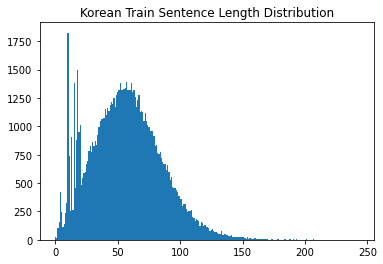

In [69]:
kotrain_sen_length = check_sentence_length( kor_clean_train, "Korean Train")

문장의 최단 길이: 0
문장의 최장 길이: 600
문장의 평균 길이: 123


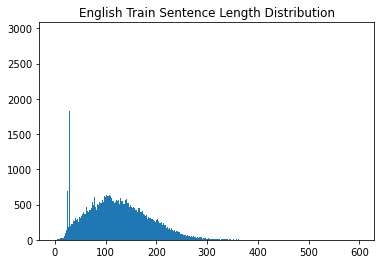

In [70]:
entrain_sen_length = check_sentence_length( eng_clean_train, "English Train")

In [71]:
check_sentence_with_length(kor_clean_train, 1)

[10494]  
[11724]  
[11849]  
[13115]  
[13759]  
[13854]  
[14077]  
[21057]  
[21073]  
[28075]  
[33709]  
[37950]  
[38393]  
[49537]  
[49633]  
[49894]  
[50155]  
[50416]  
[50677]  
[50938]  
[51199]  
[51460]  


In [76]:
print(eng_clean_train[10494])
print(eng_clean_train[11724])
print(eng_clean_train[11849])

mmr booster

cnn q


In [72]:
check_sentence_with_length(eng_clean_train, 1)

[9491] 5
[32797] 3
[32817] 7


In [75]:
print(kor_clean_train[9491])
print(kor_clean_train[32797])
print(kor_clean_train[32817])

5 어미니의 실수 
3 그곳의 잔디는 생각했던 것보다 그렇게 푸르지 않았다 
7 날씨는 언제나 번명의 수단이 될 수 있다 


In [142]:
check_sentence_with_length(kor_clean_train, 2)

[6262] <1 >
[6267] <2 >
[6271] <3 >
[6274] <4 >
[8293] <면접>
[8933] <음식>
[8939] <햇빛>
[10066] <과일>
[10076] <양파>
[13337] <4 >
[13346] <6 >
[77712] < 투>


In [78]:
print(eng_clean_train[6262])
print(eng_clean_train[6267])
print(eng_clean_train[6271])
print(eng_clean_train[77712])

1 i hated my last boss
2 i don t know anything about the company
3 no i don t have any questions for you
it will come back and you ll make more money than in the bank


In [140]:
check_sentence_with_length(eng_clean_train, 2 )

In [141]:
check_sentence_with_length(kor_clean_train, 3)

[27] <어휘 >
[30] <어휘 >
[282] <어휘 >
[1456] <어휘 >
[2226] <어휘 >
[3003] <어휘 >
[3100] <어휘 >
[3104] <번역 >
[3172] <어휘 >
[3288] <번역 >
[3289] <어휘 >
[3291] <번역 >
[3295] <번역 >
[3329] <어휘 >
[3366] <번역 >
[3374] <어휘 >
[3486] <번역 >
[3557] <어휘 >
[4393] <단장 >
[4519] <인기 >
[4758] <어휘 >
[4833] <번역 >
[5034] <번역 >
[5065] <번역 >
[5155] <사기 >
[5218] <어휘 >
[5220] <번역 >
[5278] <어휘 >
[5346] <어휘 >
[5375] <번역 >
[5494] <어휘 >
[5495] <번역 >
[5514] <어휘 >
[5596] <번역 >
[5742] <어휘 >
[5778] <번역 >
[5782] <어휘 >
[5791] <번역 >
[5800] <번역 >
[9912] < 장소>
[10134] <코브 >
[10147] <코브 >
[21064] <버뮤다>
[22515] < 쇼핑>
[26703] <첫째날>
[26710] <둘째날>
[32795] <교훈 >
[32802] <교훈 >
[64692] <이벤트>
[67263] <프린트>
[70858] <이벤트>
[72748] < 독해>
[73136] < 흡입>
[73677] < 독해>
[73825] < 임명>
[73872] < 주가>
[74049] < 결의>
[74182] < 사전>
[74663] < 시청>
[74910] < 독해>
[75189] < 사전>
[75214] < 우파>
[75973] < 참패>
[75984] < 및 >
[76096] < 독해>
[76171] < 매춘>
[76185] < 위기>
[76756] < 주주>
[77188] < 양보>
[77258] < 사전>
[77726] < 독해>
[78030] < 표준>
[78979] < 독해>
[79596] < 중령>
[79637] <

In [80]:
print(eng_clean_train[27])
print(eng_clean_train[30])
print(eng_clean_train[282])

the geneva based commission in its annual study of the industry titled world robotics 2001 said a record 100 000 robots were installed last year up 25 percent on 1999
postal service whose postmaster told a senate panel that the financial impact of the anthrax crisis could be several billion dollars uses robots to sort parcels but other automated equipment sorts letters
the united states will take every measure against what is perhaps greatest danger of all that may result from hostile states or terrorist groups armed with weapons of mass destruction bush said in a written statement


** kor-eng set으로 null이거나 의미없는 문장은 삭제한다 **

In [134]:
import pandas as pd

df_train = pd.DataFrame({
    'kor': kor_clean_train,
    'eng': eng_clean_train
})
df_train.shape

(94123, 2)

In [103]:
df_train.head

<bound method NDFrame.head of                                                      kor  \
0                   개인용 컴퓨터 사용의 상당 부분은 이것보다 뛰어날 수 있느냐 ?    
1      모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하...   
2                             그러나 이것은 또한 책상도 필요로 하지 않는다    
3      79 95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목 팔 그외에 어떤 부분이든...   
4      정보 관리들은 동남 아시아에서의 선박들에 대한 많은 테러 계획들이 실패로 돌아갔음을...   
...                                                  ...   
94118  우리는 3월 8일 김승연 회장과 그의 아들이 보복폭행에 가담한 혐의를 찾기 위해 총...   
94119   월요일 술집 종업원 6명은 김회장과 아들에게 폭행을 당했음을 진술했다고 경찰은 말했다    
94120                       그러나 불충분한 증거 확보로 수사에 어려움이 있다    
94121                  김회장과 그의 아들은 보복폭행 혐의를 강력히 부인하고 있다    
94122  경찰은 김회장의 집무실에서 추가 증거를 찾은 이후 가능한 한 오늘 김회장과 아들을 ...   

                                                     eng  
0      much of personal computing is about can you to...  
1      so a mention a few weeks ago about a rechargea...  
2      like all optical mice but it also doesn t need...  
3      uses g

In [135]:
import pandas as pd

df_test = pd.DataFrame({
    'kor': kor_clean_test,
    'eng': eng_clean_test
})
df_test.shape

(2000, 2)

In [138]:
def drop_garbage_text(df) : 
    

    # 조건 1: 문자열 길이가 0인 경우 제거
    df = df[ (df['kor'].str.len() > 0) & (df['eng'].str.len() > 0) ]

    # 조건 2: 길이가 1이고, 공백인 경우 제거
    df = df[ ~((df['kor'].str.len() == 1) & (df['kor'].str.strip() == '')) ]
    df = df[ ~((df['eng'].str.len() == 1) & (df['eng'].str.strip() == '')) ]

    # 조건 3: 길이가 2이하이고 , 숫자로 시작하는 경우 제거
    df = df[~((df['kor'].str.len() <= 2) & (df['kor'].str.match(r'^\d')))]
    df = df[~((df['eng'].str.len() <= 2) & (df['eng'].str.match(r'^\d')))]
   
     
    # 조건 4: 문장이 단일 구두점 (예: "?", "!") 만 있는 경우 제거
    remove_tokens = ['?', '!', '.', ',', '?!', '!?']
    df = df[~df['kor'].str.strip().isin(remove_tokens)]
    df = df[~df['eng'].str.strip().isin(remove_tokens)]
    
    # 조건 5: kor에서 중복인 경우 제거 
    df = df.drop_duplicates(subset='kor', keep='first')
    
    return df

In [139]:
drop_garbage_text( df_train )
df_train.shape

(94123, 2)

In [112]:
drop_garbage_text( df_test )
df_test.shape

(2000, 2)

In [148]:
# 빈 값을 Null 값으로 변환
df_train.replace('', np.nan, inplace=True)
df_train.isnull().sum()

df_train.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(df_train)))

전체 샘플수 : 94047


In [149]:
check_sentence_with_length( df_train['kor'], 0)

In [150]:
check_sentence_with_length( df_train['kor'], 1)

[10494] < >
[11848] < >
[13114] < >
[13758] < >
[13853] < >
[14076] < >
[21056] < >
[21072] < >
[28074] < >
[37948] < >
[38391] < >


In [151]:
check_sentence_with_length( df_train['kor'], 2)

[6262] <1 >
[6267] <2 >
[6271] <3 >
[6274] <4 >
[8293] <면접>
[8933] <음식>
[8939] <햇빛>
[10066] <과일>
[10076] <양파>
[13336] <4 >
[13345] <6 >
[77636] < 투>


In [116]:
check_sentence_with_length( df_train['kor'], 3)

[27] <어휘 >
[30] <어휘 >
[282] <어휘 >
[1456] <어휘 >
[2226] <어휘 >
[3003] <어휘 >
[3100] <어휘 >
[3104] <번역 >
[3172] <어휘 >
[3288] <번역 >
[3289] <어휘 >
[3291] <번역 >
[3295] <번역 >
[3329] <어휘 >
[3366] <번역 >
[3374] <어휘 >
[3486] <번역 >
[3557] <어휘 >
[4393] <단장 >
[4519] <인기 >
[4758] <어휘 >
[4833] <번역 >
[5034] <번역 >
[5065] <번역 >
[5155] <사기 >
[5218] <어휘 >
[5220] <번역 >
[5278] <어휘 >
[5346] <어휘 >
[5375] <번역 >
[5494] <어휘 >
[5495] <번역 >
[5514] <어휘 >
[5596] <번역 >
[5742] <어휘 >
[5778] <번역 >
[5782] <어휘 >
[5791] <번역 >
[5800] <번역 >
[8393] <가족 >
[10134] <코브 >
[10147] <코브 >
[10187] <유방암>
[21064] <버뮤다>
[26703] <첫째날>
[26710] <둘째날>
[32795] <교훈 >
[32802] <교훈 >
[46252] <이수지>
[54741] <한글판>
[55437] <한글판>
[56694] <한글판>
[58230] <한글판>
[62067] <한글판>
[62934] <한글판>
[63417] <한글판>
[63479] <한글판>
[64692] <이벤트>
[65595] <한글판>
[66013] <한글판>
[66805] <한글판>
[67263] <프린트>
[70858] <이벤트>
[71163] <원제 >
[71182] <원제 >
[71392] <한글판>
[71598] <한글판>
[71634] <한글판>
[72528] <한글판>
[72897] <중산층>
[73475] <결장암>
[74785] <국방부>
[74826] <현장에>
[75645] <합병증>
[77067] <

In [154]:
remove_tokens = ['어휘', '번역', '독해', '사전']
df_train = df_train[~df_train['kor'].str.strip().isin(remove_tokens)]
print('전체 샘플수 :', (len(df_train)))

전체 샘플수 : 93989


In [155]:
check_sentence_with_length( df_train['kor'], 3)

[4375] <단장 >
[4501] <인기 >
[5133] <사기 >
[9876] < 장소>
[10098] <코브 >
[10111] <코브 >
[21027] <버뮤다>
[22478] < 쇼핑>
[26666] <첫째날>
[26673] <둘째날>
[32758] <교훈 >
[32765] <교훈 >
[73023] < 흡입>
[73711] < 임명>
[73758] < 주가>
[73935] < 결의>
[74548] < 시청>
[75097] < 우파>
[75856] < 참패>
[75867] < 및 >
[76053] < 매춘>
[76067] < 위기>
[76638] < 주주>
[77070] < 양보>
[77910] < 표준>
[79475] < 중령>
[79516] < 의회>
[79885] <통계청>
[80298] < 방화>
[80599] < 업계>
[80656] < 양보>
[81309] < 독설>
[82437] < 실직>
[85039] < 법정>
[85349] < 한편>
[87545] < 인권>
[88313] <감사원>
[89631] < 상선>
[90073] <철도청>
[91488] < 인질>
[92420] <단어장>
[93503] < 교감>


### 토큰화

In [ ]:
# 한글 토큰화는 KoNLPy의 mecab 클래스

In [35]:

def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [158]:
from konlpy.tag import Mecab

mecab = Mecab()

def mecab_split(sentence):  
    return mecab.morphs(sentence)

In [165]:
# 모든 데이터를 사용할 경우 학습에 굉장히 오랜 시간이 걸립니다. 
# cleaned_corpus로부터 토큰의 길이가 40 이하인 데이터를 선별하여 eng_corpus와 kor_corpus를 각각 구축하세요.
enc_corpus = []
dec_corpus = []


for _, row in df_train.iterrows():
    kor = row['kor']
    eng = row['eng']

    if len(kor) <= 2 or len(eng) <= 2:
        continue
    
    if len(kor) <= 50 and len(eng) <=100 :
        # 한글은 mecab 토큰화
        enc_corpus.append(mecab_split(kor))
    
        # 영어는 공백 기반 토큰화
        eng = "<start> " + eng + " <end>" 
        dec_corpus.append( eng.split())

print("Korean:", enc_corpus[100]) 
print("English:", dec_corpus[100])   
  

Korean: ['보스톤', '시립', '병원', '의', '존', '리치', '박사', '는', '응급실', '에서', '많', '은', '범죄', '희생자', '들', '을', '보', '고', '있', '다']
English: ['<start>', 'john', 'rich', 'sees', 'many', 'crime', 'victims', 'in', 'the', 'emergency', 'room', '<end>']


In [166]:
# 토큰화하기
# train_test_split을 활용해서 훈련 데이터와 검증 데이터로 분리하기
# 1. 토큰화
input_tensor, enc_tokenizer = tokenize(enc_corpus)      # 한글 문장
target_tensor, dec_tokenizer = tokenize(dec_corpus)    # 영어 문장

# 2. 훈련/검증 데이터 분할
input_train, input_val, target_train, target_val = train_test_split(
    input_tensor, target_tensor, test_size=0.2, random_state=42
)

# 3. 확인
print(f"훈련 데이터 개수: {len(input_train)}")
print(f"검증 데이터 개수: {len(input_val)}")

훈련 데이터 개수: 23923
검증 데이터 개수: 5981


## Attention 기반 Seq2seq 모델을 설계

- Dropout 모듈을 추가하면 성능이 더 좋아집니다! 
- Embedding Size와 Hidden Size는 실험을 통해 적당한 값을 맞춰 주도록 합니다!

In [167]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        # h_enc shape: [batch x length x units]
        # h_dec shape: [batch x units]

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn



In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, dropout):
        super(Encoder, self).__init__()
        self.enc_units = enc_units
        
        # 임베딩 
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
       
        # GRU 층
        self.gru = tf.keras.layers.GRU(
            enc_units,
            return_sequences=True,   # 전체 시퀀스 hidden state 반환 (Attention용)
            return_state=True,       # 마지막 hidden state 반환
            recurrent_initializer='glorot_uniform'
        )
        
        self.dropout = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, hidden_state=None):     
        emb = self.embedding(x)  # [batch, seq_len, embedding_dim]

        # 초기 상태가 없다면 0으로 초기화
        if hidden_state is None:
            hidden_state = self.initialize_hidden_state(batch_size=tf.shape(emb)[0])
                    
        enc_output,state = self.gru(emb, initial_state=hidden_state) # state: [batch, enc_units]
        
        enc_output = self.dropout(enc_output)
       
        # 인코더의 모든 time step의 hidden states [batch, seq_len, units]
        return enc_output  # ← 단일 텐서만 반환!  
        
    
    def initialize_hidden_state(self, batch_size):
        return [tf.zeros((batch_size, self.enc_units))]

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, dropout):
        super(Decoder, self).__init__()
        
        self.dec_units = dec_units
        
        # 임베딩 
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        
        # TODO: Awesome Decoder Modules
        self.attention = BahdanauAttention( dec_units)   # Attention 필수 사용!
                   
        # GRU 층
        self.gru = tf.keras.layers.GRU(
            dec_units,
            return_sequences=True,   # 전체 시퀀스 hidden state 반환 (Attention용)
            return_state=True,       # 마지막 hidden state 반환
            recurrent_initializer='glorot_uniform'
        )
        
        self.dropout = tf.keras.layers.Dropout(dropout)
        
        self.fc = tf.keras.layers.Dense(vocab_size)  # 출력 단어 예측용

    def call(self, x, h_dec, enc_out):      
        # 1. 디코더 입력 임베딩
        x = self.embedding(x)  # [batch, 1, embedding_dim]
        
        # 2. Attention 계산 (self, h_enc, h_dec):
        context_vector, attention_weights = self.attention(enc_out, h_dec)  # context: [batch, enc_units]

        # 3. context_vector와 임베딩 결합
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)  # [batch, 1, embedding_dim + enc_units]

        # 4. GRU 통과
        output, state = self.gru(x)  # output: [batch, 1, dec_units]

        # 5. Dropout
        output = self.dropout(output)
        
        # 6. 출력 단어 예측
        output = tf.reshape(output, (-1, output.shape[2]))  # [batch, dec_units]
        x = self.fc(output)  # [batch, vocab_size]
        
        return x, state, attention_weights